<a href="https://colab.research.google.com/github/davidanagy/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

### Write function, use to calculate and visualize:

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  numerator = prob_positive_drunk * prob_drunk_prior
  denominator = prob_positive_drunk * prob_drunk_prior + prob_positive * (1 - prob_drunk_prior)
  return numerator / denominator

prob_drunk_given_positive(0.001, 0.08, 1)

# This isn't the exact same result in the lecture notes, but I'm pretty sure it's more accurate,
# since using the formula in the lecture notes doesn't let us iterate.

0.012357884330202669

In [67]:
# Iterate once:

iterate = prob_drunk_given_positive(prob_drunk_given_positive(0.001, 0.08, 1), 0.08, 1)
iterate

0.13525210993291495

In [68]:
# Iterate twice:

iterate2 = prob_drunk_given_positive(iterate, 0.08, 1)
iterate2

0.6615996951348605

In [69]:
# Define an iteration function (there's probably an easier way to do this...)

def bayesian_iterator(function, x, y, z, times=1):
  def i(n):
    if n==0:
      return x
    else:
      return function(i(n-1), y, z)
  n=0
  while n <= times:
    function(i(n), y, z)
    n = n+1
  return function(i(n-1), y, z)

print(bayesian_iterator(prob_drunk_given_positive, 0.001, 0.08, 1, times=0))
print(bayesian_iterator(prob_drunk_given_positive, 0.001, 0.08, 1))

0.012357884330202669
0.13525210993291495


In [70]:
results = []

for a in range(10):
  results.append(bayesian_iterator(prob_drunk_given_positive, 0.001, 0.08, 1, times=a))
  
results

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734,
 0.9997381867081508,
 0.9999790498904363,
 0.9999983239589307,
 0.9999998659165077,
 0.9999999892733192]

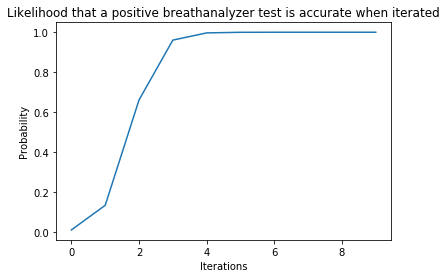

In [71]:
plt.plot(results)

plt.title('Likelihood that a positive breathanalyzer test is accurate when iterated')

plt.xlabel('Iterations')

plt.ylabel('Probability');

In [72]:
data = [prob_drunk_given_positive(0.0001, 0.08, 1),
        prob_drunk_given_positive(0.001, 0.08, 1),
        prob_drunk_given_positive(0.01, 0.08, 1),
        prob_drunk_given_positive(0.05, 0.08, 1),
        prob_drunk_given_positive(0.1, 0.08, 1),
        prob_drunk_given_positive(0.2, 0.08, 1)]

data

[0.00124856415122609,
 0.012357884330202669,
 0.11210762331838565,
 0.39682539682539686,
 0.5813953488372093,
 0.7575757575757576]

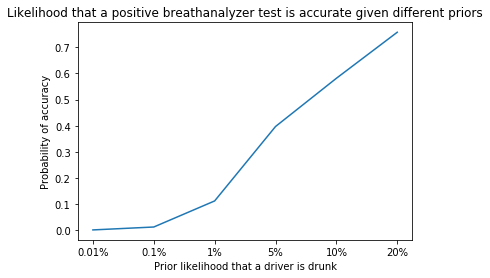

In [73]:
plt.plot(data)

plt.title('Likelihood that a positive breathanalyzer test is accurate given different priors')
plt.xlabel('Prior likelihood that a driver is drunk')
plt.ylabel('Probability of accuracy')
plt.xticks(np.arange(6), ('0.01%', '0.1%', '1%', '5%', '10%', '20%'));

In [74]:
data2 = [prob_drunk_given_positive(0.001, 0.0008, 1),
         prob_drunk_given_positive(0.001, 0.008, 1),
         prob_drunk_given_positive(0.001, 0.01, 1),
         prob_drunk_given_positive(0.001, 0.08, 1),
        prob_drunk_given_positive(0.001, 0.25, 1),
        prob_drunk_given_positive(0.001, 0.5, 1)]

data2

[0.5558025789239662,
 0.11120996441281139,
 0.09099181073703368,
 0.012357884330202669,
 0.0039880358923230315,
 0.0019980019980019984]

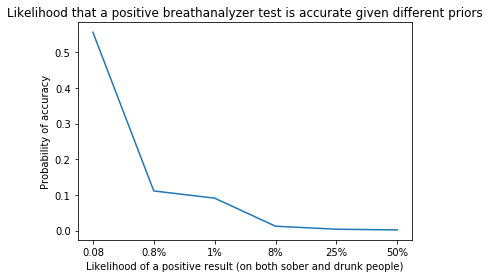

In [75]:
plt.plot(data2)

plt.title('Likelihood that a positive breathanalyzer test is accurate given different priors')
plt.xlabel('Likelihood of a positive result (on both sober and drunk people)')
plt.ylabel('Probability of accuracy')
plt.xticks(np.arange(6), ('0.08', '0.8%', '1%', '8%', '25%', '50%'));

### Explore bayes_mvs:

In [0]:
# First, to get the data (just copying and pasting from the previous assignment):

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

names = ['party', 'handicapped_infants', 'water_project', 'budget', 'physician_fee_freeze', 'el_salvador_aid',
         'religion_in_schools', 'anti_satellite_test_ban', 'aid_to_contras', 'mx_missile', 'immigration',
         'synfuels_cutback', 'education', 'right_to_sue', 'crime', 'duty_free', 'export_south_africa']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                header=None, names=names, true_values='y', false_values='n', na_values='?')

df = df.fillna(0.5)

dem = df[df['party']=='democrat']
rep = df[df['party']=='republican']

In [77]:
import scipy.stats as stats

stats.bayes_mvs(df['mx_missile'], alpha=0.95)[0]

Mean(statistic=0.5011494252873563, minmax=(0.45518569817978705, 0.5471131523949255))

In [80]:
#copying and pasting from the previous assignment

n_all = len(df['party'])

dof_all = n_all - 1

mean0 = np.mean(df['mx_missile'])

std0 = np.std(df['mx_missile'], ddof=1)

std_error0 = std0/n_all**0.5

stats.t.interval(.95, dof_all, loc=mean0, scale=std_error0) # Confirmed to be the same!

(0.45518569817978716, 0.5471131523949254)

In [82]:
labels = ['handicapped_infants', 'water_project', 'budget', 'physician_fee_freeze', 'el_salvador_aid',
         'religion_in_schools', 'anti_satellite_test_ban', 'aid_to_contras', 'mx_missile', 'immigration',
         'synfuels_cutback', 'education', 'right_to_sue', 'crime', 'duty_free', 'export_south_africa']

mean_moe_all = []
mean_moe_dem = []
mean_moe_rep = []

for label in labels:
  mean_moe_all.append(stats.bayes_mvs(df[label], alpha=.95)[0])
  mean_moe_dem.append(stats.bayes_mvs(dem[label], alpha=.95)[0])
  mean_moe_rep.append(stats.bayes_mvs(rep[label], alpha=.95)[0])
  
mean_moe_all

[Mean(statistic=0.4436781609195402, minmax=(0.3974656573709448, 0.4898906644681356)),
 Mean(statistic=0.503448275862069, minmax=(0.45895593112886873, 0.5479406205952692)),
 Mean(statistic=0.5942528735632184, minmax=(0.5485377332862238, 0.6399680138402131)),
 Mean(statistic=0.41954022988505746, minmax=(0.37359108830410415, 0.46548937146601077)),
 Mean(statistic=0.5045977011494253, minmax=(0.45824798828651336, 0.5509474140123372)),
 Mean(statistic=0.6379310344827587, minmax=(0.5932140673899587, 0.6826480015755586)),
 Mean(statistic=0.5655172413793104, minmax=(0.5195238457304102, 0.6115106370282105)),
 Mean(statistic=0.5735632183908046, minmax=(0.5277340071798993, 0.6193924296017099)),
 Mean(statistic=0.5011494252873563, minmax=(0.45518569817978705, 0.5471131523949255)),
 Mean(statistic=0.5045977011494253, minmax=(0.4578086063950709, 0.5513867959037796)),
 Mean(statistic=0.3689655172413793, minmax=(0.3246376108857248, 0.41329342359703386)),
 Mean(statistic=0.42873563218390803, minmax=(0.3

In [83]:
means_all = []

for t in mean_moe_all:
  means_all.append(t[0])
  
means_all

[0.4436781609195402,
 0.503448275862069,
 0.5942528735632184,
 0.41954022988505746,
 0.5045977011494253,
 0.6379310344827587,
 0.5655172413793104,
 0.5735632183908046,
 0.5011494252873563,
 0.5045977011494253,
 0.3689655172413793,
 0.42873563218390803,
 0.5091954022988506,
 0.5896551724137931,
 0.432183908045977,
 0.7379310344827587]

In [85]:
moe_all = []

for t in mean_moe_all:
  moe_all.append(t[0] - t[1][0])
  
moe_all

[0.04621250354859541,
 0.04449234473320024,
 0.04571514027699464,
 0.04594914158095331,
 0.046349712862911896,
 0.04471696709279993,
 0.04599339564890015,
 0.04582921121090533,
 0.04596372710756924,
 0.04678909475435433,
 0.044327906355654534,
 0.04496034937092819,
 0.04578839414642277,
 0.04546105567818837,
 0.04517796005873148,
 0.03448654430236009]

### Create visualization comparing Bayesian approach to frequentist approach:

In [86]:
# How would a frequentist determine the probability that the breathanalyzer was correct?
# Because they ignore priors, their only concern is: how likely is it that the iterated test got a false positive each time?

results_freq = []

for n in range(10):
  results_freq.append(1 - (.08**(n+1)))
  
results_freq

[0.92,
 0.9936,
 0.999488,
 0.99995904,
 0.9999967232,
 0.999999737856,
 0.99999997902848,
 0.9999999983222784,
 0.9999999998657823,
 0.9999999999892626]

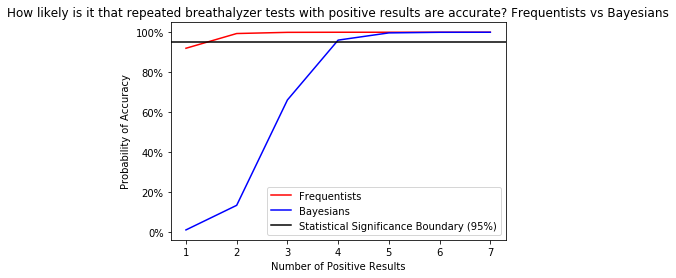

In [99]:
plt.plot(results_freq[:7], color='r', label='Frequentists')
plt.plot(results[:7], color='b', label='Bayesians')
plt.title('How likely is it that repeated breathalyzer tests with positive results are accurate? Frequentists vs Bayesians')
plt.xlabel('Number of Positive Results')
plt.ylabel('Probability of Accuracy')
plt.axhline(y=0.95, color='k', label='Statistical Significance Boundary (95%)')
plt.xticks([0, 1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6, 7])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.legend()
plt.show()

### In your own words, summarize the difference between Bayesian and Frequentist statistics:

Essentially, the difference lies in how much information they take into consideration. When analyzing the likelihood of a particular event, frequentists only look at the event itself, so to speak; they ask: "What is the probability of X given the information we have right now?" Bayesians, on the other hand, take into consideration *priors*: namely, what is the likelihood of the event in question *prior to* our new information, and how was that modified by the information we now have?

It might seem that Bayesian statistics is strictly superior to Frequentist statistics, then. However, there is always a concern with how precisely we come up with these priors. If our view on the prior probability is incorrect, a Bayesian approach will lead us astray. If we have no idea what the prior probability might be, a Frequentist approach is likely better than just guessing as to the prior.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)